# Домашние задания по курсу "Построение выводов по данным"
### Специализация "Машинное обучение и анализ данных" (Яндекс, МФТИ). Coursera.

#### 2 неделя.

## Параметрические критерии. Критерий Стьюдента

### Задача 1

Пусть $t$  — значение статистики критерия Стьюдента для независимых выборок, $nu$  —  соответствующее число степеней свободы. Какая из строчек кода вычисляет достигаемый уровень значимости $t$-критерия при альтернативе $H_1\colon \mu_1>\mu_2$?

#### **Решение:**

Из предложенных вариантов подходит только этот: $1-stats.t.cdf(t, nu)$

$cdf$ - это кумулятивная функция. Она показывает вероятность получить такие значения статистики или меньше. Значит, чтобы получить такие значения или выше, нужно из полной вероятности, т.е. 1 вычесть значение кумулятивной функции распределения.

### Задача 2

Выберите ситуации, в которых допустимо проверять нулевую гипотезу $H_0\colon \mu_1=\mu_2$ против односторонней альтернативы $H_1\colon \mu_1>\mu_2$?
 1. Признаки устроены так, что $\mu_1<\mu_2$ в принципе невозможно.
 2. Случай $\mu_1<\mu_2$ нас не интересует: например, если $X_1$ — это эффективность изобретённого нами лекарства, а $X_2$  — эффективность плацебо, не в наших интересах брать двустороннюю альтернативу, потому что мы не хотим ненароком показать, что лекарство хуже плацебо.
 3. В полученных выборках $\bar{X}_1>\bar{X}_2$

#### **Решение:**

Только первый вариант. 

Во-первых, одностороняя альтернатива выбирается только в том случае, если изменение в другую сторону невозможно.
Во-вторых, потому что необходимо решать, какая гипотеза будет проверяться ДО проведения эксперимента. Если выбирать альтернативу после проверения эксперимента и предварительной оценки полученных результатов, то это переобучение.

### Задача 3

Выберите верные утверждения о проблеме Беренца-Фишера.
1. Приближённое решение проблемы Беренца-Фишера достаточно точно при $n_1=n_2$
2. Приближённое решение проблемы Беренца-Фишера достаточно точно при $\left[n_1>n_2\right] = \left[\sigma_1<\sigma_2\right]$ 
3. Проблема заключается в том, что не существует точного способа сравнить средние двух выборок с неизвестными дисперсиями
4. Проблема заключается в том, что при сравнении средних двух выборок с неизвестными дисперсиями нельзя даже приближённо посчитать число степеней свободы у нулевого распределения $t$-критерия

#### **Решение:**

Проблема Беренца-Фишера заключается в том, что невозможно точно сравнить средние значение в двух выборках, дисперсии которых неизвестны. Это справедливо для проверок любым способом гипотез о равенстве средних в выборках с неизвестной дисперсией.

Поэтому, необходимо всегда следить за тем, чтобы выборка с большей дисперсией была не меньшего размера, чем выборка с меньшей дисперсией.

Из предложенных вариантов подходит $1$, $3$ и не подходит $2$. 

$4$ также не подходит, потому что есть формула для расчета числа степеней свободы нулевого распределения $t$-статистики:

$$ v = \frac{\left ( \frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}\right )^2}{\frac{S_1^4}{n_1^2(n_1-1)}+\frac{S_2^4}{n_2^2(n_2-1)}}$$

, где $S_1,S_2,n_1,n_2$ - дисперсии и размеры выборок соответственно

### Задача 4
Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

#### **Решение:**

$H_0: \mu_1 = \mu_0$

$H_1: \mu_1 \neq \mu_0$ (Двухторонняя альтернатива)

На основании Центральной предельной теоремы при условии, что верна нулевая гипотеза, средний уровень кальция в крови для 160 женщин должен быть распрелен нормально со средним = среднему генеральной совокупности и стандартной ошибкой среднего $se = \frac{\sigma}{\sqrt{n}}$

Построим нормальное распределение с этими значениями и узнаем, какова вероятность получить такие (9.57) или еще более выраженные отклонения уровня кальция.

In [ ]:
from scipy import stats
import numpy as np
mu0 = 9.5
mu1 = 9.57
sigma0 = 0.4
n1 = 160

se = sigma0 / np.sqrt(n1)
distr = stats.norm(loc=mu0, scale=se)
p_value = 2 * stats.norm.sf(mu1, loc=mu0, scale=se)
print('Достигаемый уровень значимости =', round(p_value, 4))

Достигаемый уровень значимости = 0.0269


На уровне значимости $\alpha = 0.05$ можно отвергнуть нулевую гипотезу о равенстве средних значений уровня кальция в крови.

### Задача 5
Как вы считаете, это отличие в среднем уровне кальция в крови практически значимо?
- Нет, раз критерий Стьюдента говорит, что отличие незначимо
- Да, раз критерий Стьюдента говорит, что отличие значимо
- Скорее всего нет: стандартное отклонение уровня в популяции намного больше полученного различия между средними

#### **Решение:**

Стандартное отклонение генеральной совокупности составляет 0.4. Т.е. примерно 95% наблюдений будут лежать в интервале $9.5 \pm 0.8$, что существенно больше, чем полученный уровень кальция $9.57$. 

Поэтому $3$ вариант в данном случае больше всего подходит.  Но точнее может сказать только специалист в данной области.

### Задача 6

Имеются данные о стоимости и размерах 53940 бриллиантов:\
Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1).\
На обучающей выборке настройте две регрессионные модели:

 - линейную регрессию с помощью LinearRegression без параметров
 - случайный лес из 10 деревьев с помощью RandomForestRegressor с random_state=1.
 
Какая из моделей лучше предсказывает цену бриллиантов?\
Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен.\
Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости.\
Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости $\alpha=0.05$?

#### **Решение:**

In [ ]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Загрузим данные
diam = pd.read_csv('diamonds.txt', sep = '\t')
diam.sample(5)

,carat,depth,table,price,x,y,z
175,0.83,64.6,54.0,2774,5.85,5.88,3.79
24831,2.01,61.1,59.0,13228,8.07,8.04,4.92
1384,0.31,62.6,56.0,559,4.33,4.37,2.72
31426,0.30,60.8,56.0,764,4.36,4.39,2.66
3965,0.90,61.5,61.0,3507,6.10,6.06,3.74


In [ ]:
# Проверим, нет ли пропусков значений и все числовые значения имеют правильный тип данных
diam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [ ]:
# Отделим целевую переменную от характеристик бриллиантов
target = diam.price
X = diam.drop(columns='price')

In [ ]:
# Разделим выборки на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=1)

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=10, random_state=1).fit(X_train, y_train)

1. Какая из моделей лучше предсказывает цену бриллиантов?

Сравним коэффициент детерминации для обоих моделей на тестовой выборке.

In [ ]:
print('Коэффициент детерминации для предсказания моделью линейной регрессии', 
      round(lr.score(X_test, y_test), 4))
print('Коэффициент детерминации для предсказания моделью случайного леса из 10 деревьев', 
      round(rf.score(X_test, y_test), 4))

Коэффициент детерминации для предсказания моделью линейной регрессии 0.8616
Коэффициент детерминации для предсказания моделью случайного леса из 10 деревьев 0.8723


Модель случайного леса более точно предсказывает цену бриллиантов.

2. Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен.
Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости  $\alpha=0.05$ ?

$H_0: \mu_{lr} = \mu_{rf}$

$H_1: \mu_{lr} \neq \mu_{rf}$ (Двухторонняя альтернатива)

Если верна нулевая гипотеза, то средние значения отклонений предсказаний моделей от истининного значения цены бриллиантов не будут отличаться.
Используем $T$-критерий для связанных выборок (т.е. модели делали предсказания по одним и тем же данным, а модули отклонений считались от одних и тех же значений)

In [ ]:
lr_dev = abs(y_test - lr.predict(X_test))
rf_dev = abs(y_test - rf.predict(X_test))

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределениe разности значений в выборках существенно не отличаются от нормальных.

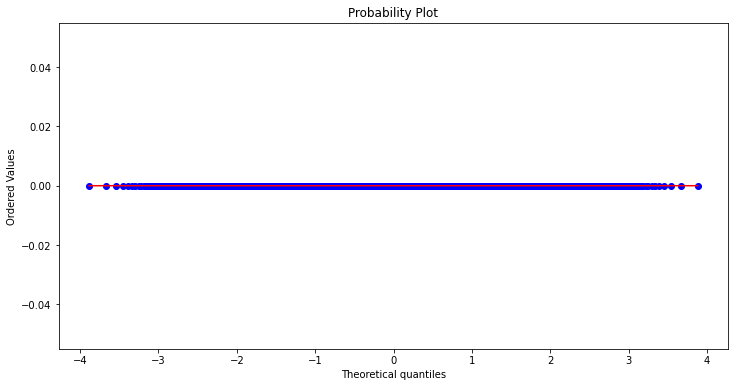

In [ ]:
plt.figure(figsize=(12,6))
stats.probplot((lr_dev - rf_dev), dist=stats.norm, plot=plt)
plt.show()

Очевидно, что $t$-критерий подходит для сравнения средних в этих выборках.

Посчитаем $T$-статистику:

$T = \frac {\mu_1 - \mu_2}{\sqrt{\frac{S}{n}}}$,

где S - дисперсия разности выборок

In [ ]:
mu_lr = lr_dev.mean()
mu_rf = rf_dev.mean()
n = len(lr_dev)
s = np.var(lr_dev - rf_dev, ddof=1)
t_stat = (mu_lr - mu_rf) / np.sqrt(s / n)
p_val = 2 * stats.t(n-1).sf(t_stat)

In [ ]:
print('Вероятность получить такие или еще более выраженные значения статистики при условии, что верна нулевая гипотеза =',
      p_val)

Вероятность получить такие или еще более выраженные значения статистики при условии, что верна нулевая гипотеза = 1.6551745751596883e-38


Посчитаем еще по-другому. Используем функцию из пакета $scipy.stats$

In [ ]:
# Посчитаем t-критерий для связанных выборок
stats.ttest_rel(lr_dev, rf_dev)

Ttest_relResult(statistic=13.017729783878435, pvalue=1.6551745751440493e-38)

Можно уверенно отвергнуть нулевую гипотезу об одинаковом среднем качестве предсказаний на уровне значимости менее $\alpha=0.01$

### Задача 7
В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

#### **Решение:**

Доверительный интервал для разности средних абсолютных ошибок предсказаний двух моделей считается по формуле:
$$\overline{X} \pm t_{1 - \alpha/2} \cdot \sqrt{\frac{S}{n}}$$
, где 
- $\overline{X}$ - среднее разности
- $t_{1 - \alpha/2}$ - значение $t$-статистики для нужного интервала
- $S$ - дисперсия разности
- $n$ - размер выборки

In [ ]:
# Для расчета используются данные из предыдущей задачи, включая импортированные библиотеки
x = (lr_dev - rf_dev).mean()
s = (lr_dev - rf_dev).var(ddof=1)
n = len(lr_dev)
t = stats.t(n-1).isf(1 - 0.05/2)
side = t * np.sqrt(s / n)
print(f'95% доверительный интервал для разности средних абсолютных ошибок предсказаний двух моделей: \
 [{round(x + side, 6)} ; {round(x - side, 6)}]')

95% доверительный интервал для разности средних абсолютных ошибок предсказаний двух моделей:  [74.287245 ; 100.624521]


Воспользуемся пакетом $stats.weightstats$ из библиотеки $statsmodels$

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

cm = DescrStatsW((lr_dev - rf_dev))
print('95%% доверительный интервал для разности средних абсолютных ошибок предсказаний двух моделей: \
  [%f; %f]' % cm.tconfint_mean())

95% доверительный интервал для разности средних абсолютных ошибок предсказаний двух моделей:   [74.287245; 100.624521]


## Параметрические критерии

### Задача 1

Существуют две версии одновыборочного Z-критерия для доли, отличающихся формулами для статистики. Одна из этих версий более точная, поэтому мы говорили только о ней, а вторую не обсуждали вообще. Какую из этих двух версий одновыборочных Z-критериев для доли мы проходили?

- Версия множителей Лагранжа со статистикой $Z = \frac{\hat p - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$

- Версия Вальда со статистикой $Z = \frac{\hat p - p_0}{\sqrt{\frac{\hat p(1-\hat p)}{n}}}$

#### **Решение:**

Мы рассматривали версию множителей Лагранжа, где $\hat p = \overline X_n$

### Задача 2

Какую информацию использует $Z$-критерий для двух долей в связанных выборках?


#### **Решение:**

В $Z$-критерии для связанных выборок используется статистика, в которую входят только те объекты, на которых значения двух признаков отличаются.
Объекты, на которых значения признаков совпадают, в критерии не используются.

 $X_2 \\ X_1$  | $X_2 = 1$ | $X_2 = 0$ | $\sum$
  -------------------------- | --------------------------|--------------------------|--------------------------|
  $X_1 = 1$ | e | f | e+f
  $X_1 = 0$  | g | h | g+h
  $\sum$ | e+g| f+h | n

   $$Z = \frac{f-g}{\sqrt{f+g - \frac{(f-g)^2}{n}}} $$

### Задача 3

В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате. 

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён. 

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

#### **Решение:**

Для решения этой задачи можно использовать $Z$-критерий для независимых выборок. Выборки можно считать независыми, потому что рекрутер зевал с одними не людьми и не зевал с другими.

$H_0: p_1=p_2$

$H_1: p_1>p_2$, где $p_1,p_2$ - вероятность положительного исхода в эксперементальной и контрольной группах соответственно. Нас интересует одностороняя гипотеза - зевота заразительна.

$Z = \frac{\hat p_1 - \hat p_2}{\sqrt{P(1-P)(\frac{1}{n_1} + \frac{1}{n_2})}}$

$P = \frac{\hat p_1 n_1 + \hat p_2 n_2}{n_1 + n_2}$

Исход \выборка | $X_1$ | $X_2$ |
----|----|----|
1  | a = 10 | b = 4
  0  | c = 24| d = 12
  $\sum$ | $n_1$ = 34| $n_2$ = 16

$\hat p_1 = \frac{a}{n_1}$

$\hat p_2 = \frac{b}{n_2}$



In [1]:
import numpy as np
from scipy import stats

In [2]:
a = 10
n1 = 34
b = 4
n2 = 16
p1 = a / n1
p2 = b / n2
P = (a + b) / (n1 + n2)

Z = (p1 - p2) / np.sqrt(P * (1 - P) * (1 / n1 + 1 / n2))

In [4]:
p_val = stats.norm.sf(Z)
print('Вероятность получить такую или еще более сильнцю разницу долей p-value = ', round(p_val, 5))

Вероятность получить такую или еще более сильнцю разницу долей p-value =  0.37293


*Отвергнуть нулевую гипотезу на уровне 0.05 нельзя. Значит разница в выборках не позволяет утверждать, что зевота заразительна.*

Дополнительно убедимся, что нулевую гипотезу нельзя отвергнуть, построив доверительные интервалы

In [7]:
def proportions_diff_confint_ind(a, n1, b, n2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = a / n1
    p2 = b / n2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    return (left_boundary, right_boundary)

In [8]:
print("95%% Доверительный интервал для разницы долей: [%f, %f]" %proportions_diff_confint_ind(a, n1, b, n2))

95% Доверительный интервал для разницы долей: [-0.217558, 0.305793]


Доверительный интервал содержит ноль, поэтому нельзя уверенно сказать, что разница долей в выборках существенна.

### Задача 4

Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными. На рисунке ниже показаны измеренные признаки (6 изменений по банкноте).

Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:

 - логистическая регрессия по признакам $X_1, X_2, X_3$;
 - логистическая регрессия по признакам $X_4, X_5, X_6$.
 
Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили $5.5\times10^{-8}$, нужно ввести $8$).

#### **Решение:**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats
import numpy as np

In [10]:
from google.colab import files
files.upload()

Saving banknotes.txt to banknotes.txt


{'banknotes.txt': b'X1\tX2\tX3\tX4\tX5\tX6\treal\r\n214.8\t131\t131.1\t9\t9.7\t141\t1\r\n214.6\t129.7\t129.7\t8.1\t9.5\t141.7\t1\r\n214.8\t129.7\t129.7\t8.7\t9.6\t142.2\t1\r\n214.8\t129.7\t129.6\t7.5\t10.4\t142\t1\r\n215\t129.6\t129.7\t10.4\t7.7\t141.8\t1\r\n215.7\t130.8\t130.5\t9\t10.1\t141.4\t1\r\n215.5\t129.5\t129.7\t7.9\t9.6\t141.6\t1\r\n214.5\t129.6\t129.2\t7.2\t10.7\t141.7\t1\r\n214.9\t129.4\t129.7\t8.2\t11\t141.9\t1\r\n215.2\t130.4\t130.3\t9.2\t10\t140.7\t1\r\n215.3\t130.4\t130.3\t7.9\t11.7\t141.8\t1\r\n215.1\t129.5\t129.6\t7.7\t10.5\t142.2\t1\r\n215.2\t130.8\t129.6\t7.9\t10.8\t141.4\t1\r\n214.7\t129.7\t129.7\t7.7\t10.9\t141.7\t1\r\n215.1\t129.9\t129.7\t7.7\t10.8\t141.8\t1\r\n214.5\t129.8\t129.8\t9.3\t8.5\t141.6\t1\r\n214.6\t129.9\t130.1\t8.2\t9.8\t141.7\t1\r\n215\t129.9\t129.7\t9\t9\t141.9\t1\r\n215.2\t129.6\t129.6\t7.4\t11.5\t141.5\t1\r\n214.7\t130.2\t129.9\t8.6\t10\t141.9\t1\r\n215\t129.9\t129.3\t8.4\t10\t141.4\t1\r\n215.6\t130.5\t130\t8.1\t10.3\t141.6\t1\r\n215.3\t130.6\t130

In [14]:
# Загрузим данные
banknotes = pd.read_csv('banknotes.txt', sep = '\t')
banknotes.sample(5)

,X1,X2,X3,X4,X5,X6,real
19,214.7,130.2,129.9,8.6,10.0,141.9,1
58,215.1,130.1,129.9,7.9,11.0,141.3,1
100,214.4,130.1,130.3,9.7,11.7,139.8,0
160,215.6,130.1,129.7,7.4,12.2,138.4,0
187,214.8,130.0,129.7,11.4,10.6,139.2,0


In [12]:
# Убедимся, что числовые типа указаны верно, и пропуски отсуствуют
banknotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      200 non-null    float64
 1   X2      200 non-null    float64
 2   X3      200 non-null    float64
 3   X4      200 non-null    float64
 4   X5      200 non-null    float64
 5   X6      200 non-null    float64
 6   real    200 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [15]:
# Разделим выборки на обучающую и тестовую
target = banknotes.real
features = banknotes.drop(columns='real')

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=1)

In [23]:
# Отберем признаки для каждого классификатора
x_lr_1 = x_train[['X1', 'X2', 'X3']]
x_lr_2 = x_train[['X4', 'X5', 'X6']]

x_test_1 = x_test[['X1', 'X2', 'X3']]
x_test_2 = x_test[['X4', 'X5', 'X6']]

In [28]:
# Построим классификаторы и оценим качество
lr_1 = LogisticRegression().fit(x_lr_1, y_train)
lr_2 = LogisticRegression().fit(x_lr_2, y_train)

score_1 = lr_1.score(x_test_1, y_test)
score_2 = lr_2.score(x_test_2, y_test)

print('Accuracy классификатора по признакам X1, X2, X3 = ', score_1)
print('Accuracy классификатора по признакам X4, X5, X6 = ', score_2)

Accuracy классификатора по признакам X1, X2, X3 =  0.8
Accuracy классификатора по признакам X4, X5, X6 =  0.98


Похоже, что второй классификатор более точно предсказывает метку класса

По условию задачи надо проверить одинаковы ли доли ошибочных предсказаний двух классификаторов. В первом случае это 0.2, во втором 0.02.\
Здесь мы имеем связанные выборки, потому что признаки $X_n$ относятся к одной банкноте.

$H_0$ : $p_1 = p_2$;\
$H_1$ : $p_1 \neq p_2$;

 $X_2 \\ X_1$  | $X_2 = 1$ | $X_2 = 0$ | $\sum$
  -------------------------- | --------------------------|--------------------------|--------------------------|
  $X_1 = 1$ | e | f | e + f
  $X_1 = 0$  | g | h | g + h
  $\sum$ | e + g| f + h | n

  
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

$$Z-статистика: Z({X_1, X_2}) = \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$$

Поскольку мы сравниваем доли ошибок, то для нас 0 - это 1, а 1 - это ноль

In [29]:
# Получим предсказания
pred_1 = lr_1.predict(x_test_1)
pred_2 = lr_2.predict(x_test_2)

# Вычтем из предсказаний реальный ответ. Так мы получим 1 - там, где ошибка, а 0 - там, где верно.
y_samp_1 = abs(y_test - pred_1)
y_samp_2 = abs(y_test - pred_2)

In [31]:
# Напишем функцию для расчета z-статистики для связанных выборок
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample]) # 1 в первой выборке при условии, что 0 во второй
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample]) # 1 во второй выборке при условии, что 0 в первой
    
    return (f - g) / np.sqrt(f + g - ((f - g)**2) / n )

In [32]:
# Напишем функцию для расчета p-value (достигаемого уровня значимости)
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (stats.norm.sf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return stats.norm.sf(z_stat)

In [41]:
# Посчитаем Z-статистику и p_value
Z = proportions_diff_z_stat_rel(y_samp_1, y_samp_2)

p_val = proportions_diff_z_test(Z, alternative = 'two-sided')

print('Достигаемый уровень значимости для разницы долей ошибок двух классификаторов при двухсторонней альтернативе =', round(p_val, 8))

Достигаемый уровень значимости для разницы долей ошибок двух классификаторов при двухсторонней альтернативе = 0.00329694


*На уровне значимости $\alpha = 0.01$ нулевую гипотезу о равенстве долей ошибок двух классификаторов можно отвергнуть*

### Задача 5
В предыдущей задаче посчитайте 95% доверительный интервал для разности долей ошибок двух классификаторов. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после десятичной точки.

#### **Решение:**

In [48]:
# Напишем функцию для расчета доверительного интервала для связанных выборок
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample]) # 1 в первой выборке при условии, что 0 во второй
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample]) # 1 во второй выборке при условии, что 0 в первой
    
    left_boundary = (f - g) / n  - z * np.sqrt((f + g) / n**2 - (f - g)**2 / n**3)
    right_boundary = (f - g) / n  + z * np.sqrt((f + g) / n**2 - (f - g)**2 / n**3)
    return (left_boundary, right_boundary)

In [49]:
print("95%% Доверительный интервал для разницы долей: [%f, %f]" %proportions_diff_confint_rel(y_samp_1, y_samp_2, alpha=0.05))

95% Доверительный интервал для разницы долей: [0.059945, 0.300055]


Доверительный интервал не содержит ноль, поэтому можно утверждать, что разница долей ошибок двух классифкаторов существенна.

### Задача 6

Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов. 

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки. 

#### **Решение:**

Для решения этой задачи подходит $Z$ - критерий.

$H_0: \overline X = \mu_0$

$H_1: \overline X > \mu_0$

$Z = \frac{\overline X - \mu_0}{\frac{\sigma}{\sqrt{n}}}$

In [50]:
from scipy import stats
import numpy as np

In [51]:
# Посчитаем Z-статистику
mu = 525
sigma = 100
x = 541.4
n = 100

z = (x - mu) * np.sqrt(n) / sigma

In [52]:
# Воспользуемся функцией выше, для расчета достигаемого уровня значимости
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (stats.norm.sf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return stats.norm.sf(z_stat)

p_val = proportions_diff_z_test(z, alternative = 'greater')
print('Вероятность получить такое или еще более высокое отклонение от среднего значения ген.совокупности =', round(p_val, 6))

Вероятность получить такие или еще более выраженные отклонения от среднего значения ген.совокупности = 0.050503


*Нельзя отвергнуть нулевую гипотезу и утверждать, что подготовительные курсы эффективны*

### Задача 7
Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки. 

#### **Решение:**

Эта задача отличается от предыдущей только в значении среднего балла выпускников подготовительных курсов.

In [53]:
# Посчитаем Z-статистику
mu = 525
sigma = 100
x = 541.5
n = 100

z = (x - mu) * np.sqrt(n) / sigma

p_val = proportions_diff_z_test(z, alternative = 'greater')
print('Вероятность получить такое или еще более высокое отклонение от среднего значения ген.совокупности =', round(p_val, 6))

Вероятность получить такое или еще более высокое отклонение от среднего значения ген.совокупности = 0.049471


*Т.е. повышение среднего балла прошедших курс всего на 0.1 позволило отклонить нулевую гипотезу о неэффективности курсов*